<a href="https://colab.research.google.com/github/DmitriiKnyazkin/Yolo_TEST/blob/master/MP_ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [8]:
import cv2
import numpy as np

In [6]:
cap = cv2.VideoCapture('/content/VID_20240911_192631.mp4')

In [5]:
def main():
    # Задаем точки для обрезания
    x_0 = 100
    x_1 = 440
    y_0 = 0
    y_1 = 450


    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    # passing the dimensions of cropped area to VideoWriter
    out_video = cv2.VideoWriter('recording.avi', fourcc, 15.0, (x_1-x_0, y_1-y_0))

    while(cap.isOpened()):
        ret, frame = cap.read()

        if ret == True:
            frame_crop = frame[y_0:y_1, x_0:x_1]
            out_video.write(frame_crop)
            #cv2.imshow("crop", frame_crop)
            key = cv2.waitKey(25)
            if key == ord('q'):
                break
        else:
            break

    cv2.destroyAllWindows()
    cap.release()


if __name__ == "__main__":
    main()

In [9]:
import matplotlib.pyplot as plt
import mediapipe as mp

mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

In [10]:
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs))

# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

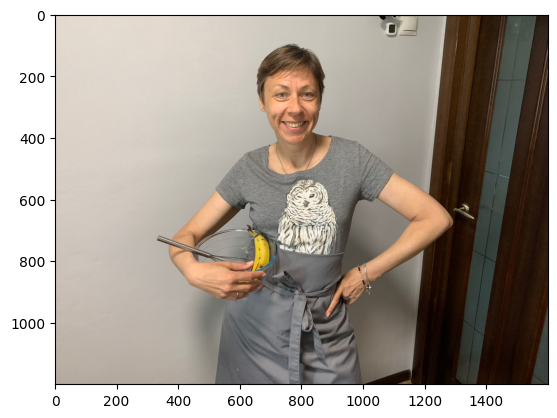

In [11]:
image = cv2.imread(r"/content/1714290096869.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
image = np.ascontiguousarray(image)
imgH, imgW, _ = image.shape

plt.imshow(image)

In [12]:
with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # Default=1
    refine_landmarks=False,         # Default=False
    min_detection_confidence=0.5,   # Default=0.5
    min_tracking_confidence= 0.5,   # Default=0.5
) as face_mesh:

    results = face_mesh.process(image)

# Indicates whether any detections are available or not.
print(bool(results.multi_face_landmarks))

True


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [13]:
landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)

landmark_0_x = landmark_0.x * imgW
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW # according to documentation

print()
print("X:", landmark_0_x)
print("Y:", landmark_0_y)
print("Z:", landmark_0_z)

print()
print("Total Length of '.landmark':", len(results.multi_face_landmarks[0].landmark))

x: 0.488182604
y: 0.289040595
z: -0.0117830681


X: 781.0921669006348
Y: 346.84871435165405
Z: -18.85290890932083

Total Length of '.landmark': 468


In [14]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt

     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks

    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness,
        circle_radius=ts_circle_radius,
        color=(255, 255, 255)
    )

    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")

    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )

    # Get the object which holds the x, y, and z coordinates for each landmark
    landmarks = face_landmarks.landmark

    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.

    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(image_eye_lmks,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return

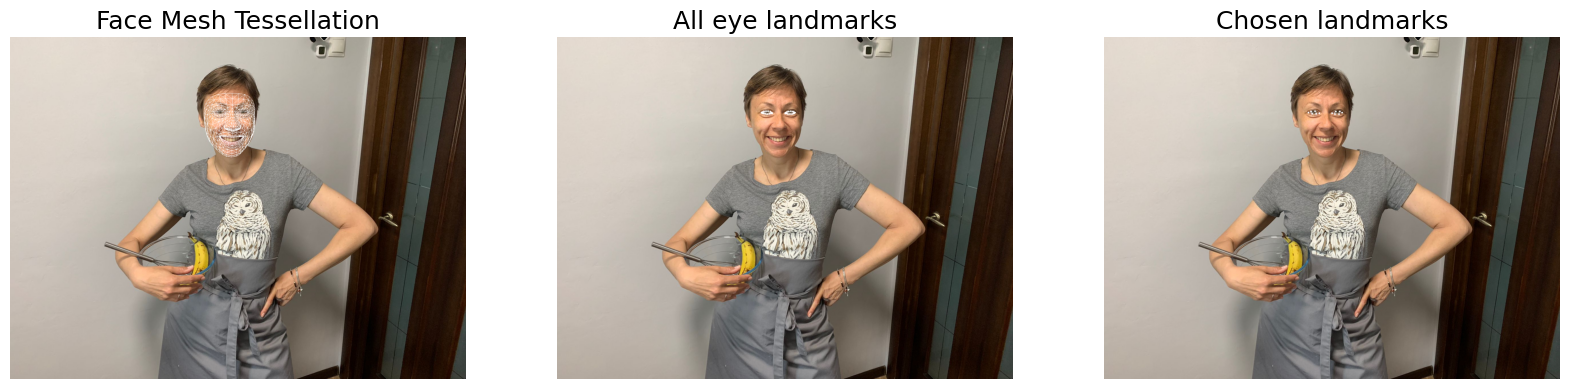

In [15]:
if results.multi_face_landmarks:

    # Iterate over detections of each face. Here, we have max_num_faces=1,
    # So there will be at most 1 element in
    # the 'results.multi_face_landmarks' list
    # Only one iteration is performed.

    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks)

In [ ]:
# импорт библиотек
import os

import numpy as np
import pandas as pd
import scipy
import scipy.io

from PIL import Image
import cv2

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [16]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.

    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame

    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y,
                                             frame_width, frame_height)
            coords_points.append(coord)

        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])

        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)

    except:
        ear = 0.0
        coords_points = None

    return ear, coords_points

In [17]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""

    left_ear, left_lm_coordinates = get_ear(
                                      landmarks,
                                      left_eye_idxs,
                                      image_w,
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks,
                                      right_eye_idxs,
                                      image_w,
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0

    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


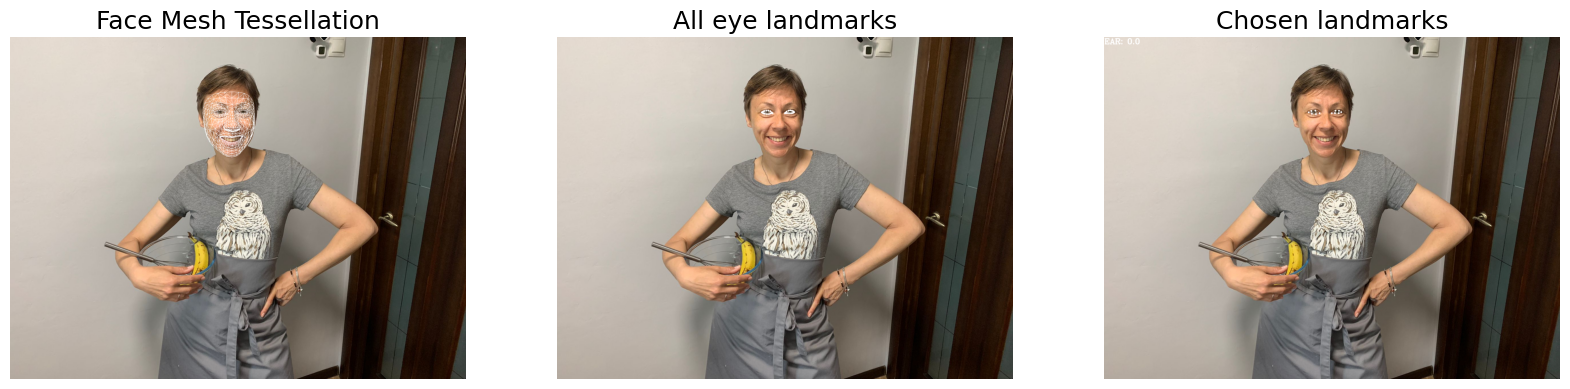

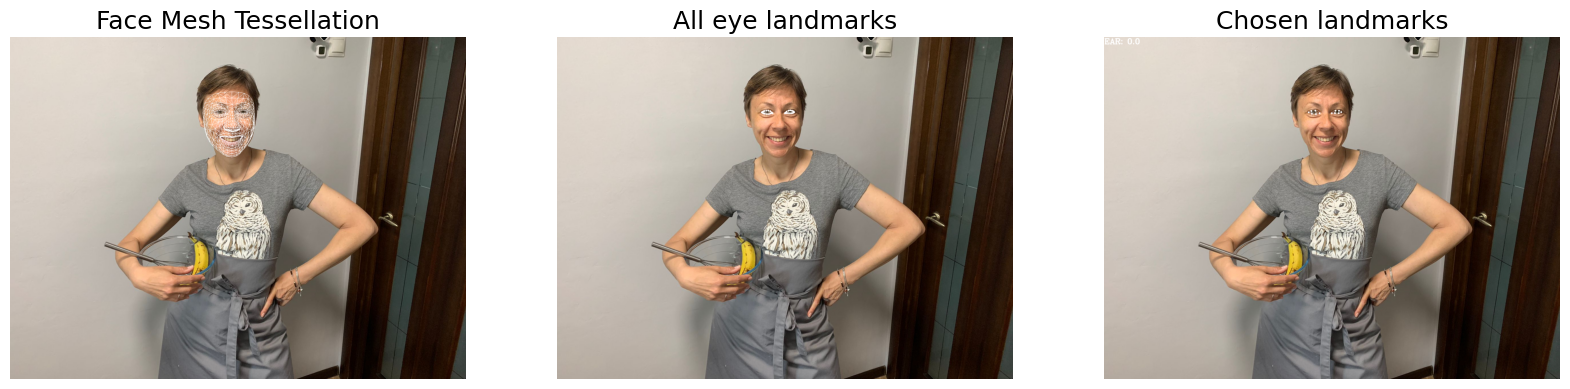

In [21]:
image_eyes_open  = cv2.imread(r"/content/1714290096869.jpg")[:, :, ::-1]
image_eyes_close = cv2.imread(r"/content/1714290096869.jpg")[:, :, ::-1]


for idx, image in enumerate([image_eyes_open, image_eyes_close]):

    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()

    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks

        # If detections are available.
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                EAR, _ = calculate_avg_ear(
                          landmarks,
                          chosen_left_eye_idxs,
                          chosen_right_eye_idxs,
                          imgW,
                          imgH
                      )

                # Print the EAR value on the custom_chosen_lmk_image.
                cv2.putText(custom_chosen_lmk_image,
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX,
                            0.9, (255, 255, 255), 2
                )

                plot(img_dt=image.copy(),
                     img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks,
                     ts_thickness=1,
                     ts_circle_radius=3,
                     lmk_circle_radius=3

                     )

In [22]:
import time
import mediapipe as mp
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates as denormalize_coordinat

In [23]:
def distance(point_1, point_2):
    ...
    ...
    return dist

def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    ...
    ...
    return ear, coords_points

def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    ...
    ...
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

def get_mediapipe_app(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
):
    """Initialize and return Mediapipe FaceMesh Solution Graph object"""
    face_mesh = mp.solutions.face_mesh.FaceMesh(
        max_num_faces=max_num_faces,
        refine_landmarks=refine_landmarks,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    )

    return face_mesh

def plot_eye_landmarks(frame, left_lm_coordinates,
                       right_lm_coordinates, color
                       ):
    for lm_coordinates in [left_lm_coordinates, right_lm_coordinates]:
        if lm_coordinates:
            for coord in lm_coordinates:
                cv2.circle(frame, coord, 2, color, -1)

    frame = cv2.flip(frame, 1)
    return frame


def plot_text(image, text, origin,
              color, font=cv2.FONT_HERSHEY_SIMPLEX,
              fntScale=0.8, thickness=2
              ):
    image = cv2.putText(image, text, origin, font, fntScale, color, thickness)
    return image

In [24]:
class VideoFrameHandler:
    def __init__(self):
        """
        Initialize the necessary constants, mediapipe app
        and tracker variables
        """
        # Left and right eye chosen landmarks.
        self.eye_idxs = {
            "left": [362, 385, 387, 263, 373, 380],
            "right": [33, 160, 158, 133, 153, 144],
        }

        # Used for coloring landmark points.
        # Its value depends on the current EAR value.
        self.RED = (0, 0, 255)  # BGR
        self.GREEN = (0, 255, 0)  # BGR

        # Initializing Mediapipe FaceMesh solution pipeline
        self.facemesh_model = get_mediapipe_app()

        # For tracking counters and sharing states in and out of callbacks.
        self.state_tracker = {
            "start_time": time.perf_counter(),
            "DROWSY_TIME": 0.0,  # Holds time passed with EAR < EAR_THRESH
            "COLOR": self.GREEN,
            "play_alarm": False,
        }

        self.EAR_txt_pos = (10, 30)

In [25]:
def process(self, frame: np.array, thresholds: dict):
        """
        This function is used to implement our Drowsy detection algorithm.

        Args:
            frame: (np.array) Input frame matrix.
            thresholds: (dict) Contains the two threshold values
                               WAIT_TIME and EAR_THRESH.

        Returns:
            The processed frame and a boolean flag to
            indicate if the alarm should be played or not.
        """

        # To improve performance,
        # mark the frame as not writeable to pass by reference.
        frame.flags.writeable = False
        frame_h, frame_w, _ = frame.shape
        DROWSY_TIME_txt_pos = (10, int(frame_h // 2 * 1.7))
        ALM_txt_pos = (10, int(frame_h // 2 * 1.85))

        results = self.facemesh_model.process(frame)

        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark
            EAR, coordinates = calculate_avg_ear(landmarks,
                                                 self.eye_idxs["left"],
                                                 self.eye_idxs["right"],
                                                 frame_w,
                                                 frame_h
                                                 )
            frame = plot_eye_landmarks(frame,
                                       coordinates[0],
                                       coordinates[1],
                                       self.state_tracker["COLOR"]
                                       )

            if EAR < thresholds["EAR_THRESH"]:

                # Increase DROWSY_TIME to track the time period with
                # EAR less than the threshold
                # and reset the start_time for the next iteration.
                end_time = time.perf_counter()

                self.state_tracker["DROWSY_TIME"] += end_time - self.state_tracker["start_time"]
                self.state_tracker["start_time"] = end_time
                self.state_tracker["COLOR"] = self.RED

                if self.state_tracker["DROWSY_TIME"] >= thresholds["WAIT_TIME"]:
                    self.state_tracker["play_alarm"] = True
                    plot_text(frame, "WAKE UP! WAKE UP",
                              ALM_txt_pos, self.state_tracker["COLOR"])

            else:
                self.state_tracker["start_time"] = time.perf_counter()
                self.state_tracker["DROWSY_TIME"] = 0.0
                self.state_tracker["COLOR"] = self.GREEN
                self.state_tracker["play_alarm"] = False

            EAR_txt = f"EAR: {round(EAR, 2)}"
            DROWSY_TIME_txt = f"DROWSY: {round(self.state_tracker['DROWSY_TIME'], 3)} Secs"
            plot_text(frame, EAR_txt,
                      self.EAR_txt_pos, self.state_tracker["COLOR"])
            plot_text(frame, DROWSY_TIME_txt,
                      DROWSY_TIME_txt_pos, self.state_tracker["COLOR"])

        else:
            self.state_tracker["start_time"] = time.perf_counter()
            self.state_tracker["DROWSY_TIME"] = 0.0
            self.state_tracker["COLOR"] = self.GREEN
            self.state_tracker["play_alarm"] = False

            # Flip the frame horizontally for a selfie-view display.
            frame = cv2.flip(frame, 1)

        return frame, self.state_tracker["play_alarm"]

In [31]:
pip install av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 14.3 MB/s eta 0:00:00


In [33]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [35]:
pip install streamlit-webrtc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.8/773.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: av
    Found existing installation: av 13.0.0
    Uninstalling av-13.0.0:
      Successfully uninstalled av-13.0.0


In [36]:
pip install librosa

In [2]:
import os
import av
import threading
import streamlit as st
from streamlit_webrtc import VideoHTMLAttributes, webrtc_streamer

#from audio_handling import AudioFrameHandler
from drowsy_detection import VideoFrameHandler

# Define the audio file to use.
alarm_file_path = os.path.join("audio", "wake_up.wav")

# Streamlit Components
st.set_page_config(
    page_title="Drowsiness Detection | LearnOpenCV",
    page_icon="https://learnopencv.com/wp-content/uploads/2017/12/favicon.png",
    layout="centered",
    initial_sidebar_state="expanded",
    menu_items={
        "About": "### Visit www.learnopencv.com for more exciting tutorials!!!",
    },
)

st.title("Drowsiness Detection!")

col1, col2 = st.columns(spec=[1, 1])

with col1:
    # Lowest valid value of Eye Aspect Ratio. Ideal values [0.15, 0.2].
    EAR_THRESH = st.slider("Eye Aspect Ratio threshold:", 0.0, 0.4, 0.18, 0.01)

with col2:
    # The amount of time (in seconds) to wait before sounding the alarm.
    WAIT_TIME = st.slider("Seconds to wait before sounding alarm:", 0.0, 5.0, 1.0, 0.25)

thresholds = {
    "EAR_THRESH": EAR_THRESH,
    "WAIT_TIME": WAIT_TIME,
}

# For streamlit-webrtc
video_handler = VideoFrameHandler()
#audio_handler = AudioFrameHandler(sound_file_path=alarm_file_path)

# For thread-safe access & to prevent race-condition.
lock = threading.Lock()

shared_state = {"play_alarm": False}

def video_frame_callback(frame: av.VideoFrame):
    frame = frame.to_ndarray(format="bgr24")  # Decode and convert frame to RGB

    frame, play_alarm = video_handler.process(frame, thresholds)  # Process frame
    with lock:
        shared_state["play_alarm"] = play_alarm  # Update shared state

    # Encode and return BGR frame
    return av.VideoFrame.from_ndarray(frame, format="bgr24")

def audio_frame_callback(frame: av.AudioFrame):
    with lock:  # access the current “play_alarm” state
        play_alarm = shared_state["play_alarm"]

    new_frame: av.AudioFrame = audio_handler.process(frame,
                                                     play_sound=play_alarm)
    return new_frame

ctx = webrtc_streamer(
    key="driver-drowsiness-detection",
    video_frame_callback=video_frame_callback,
    audio_frame_callback=audio_frame_callback,
    rtc_configuration={"iceServers": [{"urls": ["stun:stun.l.google.com:19302"]}]},
    media_stream_constraints={"video": {"width": True, "audio": True}},
    video_html_attrs=VideoHTMLAttributes(autoPlay=True, controls=False, muted=False)
    )

ModuleNotFoundError: No module named 'drowsy_detection'

In [ ]:
!wget https://datasets.d2.mpi-inf.mpg.de/MPIIGaze/MPIIGaze.tar.gz
!tar xvzf MPIIGaze.tar.gz MPIIGaze

Выходные данные были обрезаны до нескольких последних строк (5000).
MPIIGaze/Data/Original/p06/day01/0292.jpg
MPIIGaze/Data/Original/p06/day01/0244.jpg
MPIIGaze/Data/Original/p06/day01/0182.jpg
MPIIGaze/Data/Original/p06/day01/0153.jpg
MPIIGaze/Data/Original/p06/day01/0295.jpg
MPIIGaze/Data/Original/p06/day01/0238.jpg
MPIIGaze/Data/Original/p06/day01/0077.jpg
MPIIGaze/Data/Original/p06/day01/0166.jpg
MPIIGaze/Data/Original/p06/day01/0271.jpg
MPIIGaze/Data/Original/p06/day01/0329.jpg
MPIIGaze/Data/Original/p06/day01/0093.jpg
MPIIGaze/Data/Original/p06/day01/0042.jpg
MPIIGaze/Data/Original/p06/day01/0094.jpg
MPIIGaze/Data/Original/p06/day01/0045.jpg
MPIIGaze/Data/Original/p06/day01/0161.jpg
MPIIGaze/Data/Original/p06/day01/0276.jpg
MPIIGaze/Data/Original/p06/day01/0039.jpg
MPIIGaze/Data/Original/p06/day01/0113.jpg
MPIIGaze/Data/Original/p06/day01/0204.jpg
MPIIGaze/Data/Original/p06/day01/0278.jpg
MPIIGaze/Data/Original/p06/day01/0320.jpg
MPIIGaze/Data/Original/p06/day01/0037.jpg
MPIIGaze

In [ ]:
database_path = "/content/MPIIGaze"

# функция для загрузки фотографий одного человека
def load_image_data(patient_name):
    global database_path

    annotation_path = os.path.join(database_path, "Annotation Subset", patient_name + ".txt")
    data_folder = os.path.join(database_path, "Data", "Original", patient_name)

    annotation = pd.read_csv(annotation_path, sep=" ", header=None)

    points = np.array(annotation.loc[:, list(range(1, 17))])

    filenames = np.array(annotation.loc[:, [0]]).reshape(-1)
    images = [np.array(Image.open(os.path.join(data_folder, filename))) for filename in filenames]

    return images, points

In [ ]:
images, points = load_image_data("p00")

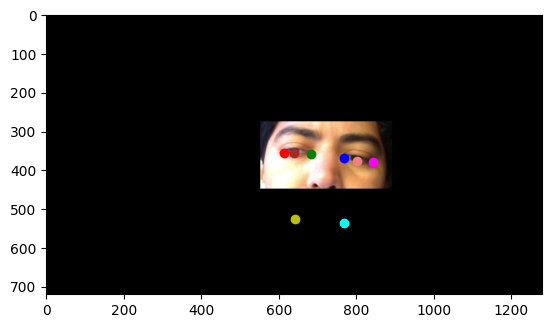

In [ ]:
plt.imshow(images[0])
colors = ["r", "g", "b", "magenta", "y", "cyan", "brown", "lightcoral"]
for i in range(0, len(points[0]), 2):
    x, y = points[0, i:i+2] # вот туть мне удалось понять, что координаты точек хранятся по 2, причем в формате X, Y
    plt.scatter([x], [y], c=colors[i//2])

In [ ]:
# функция расстояния между двумя точками
def distance(x1, y1, x2, y2):
    return int(((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)

image_shape = (16, 32)

# здесь вырезаем из большой картинки глаз и находим относительное положение зрачка
# это понадобится позже
def handle_eye(image, p1, p2, pupil):
    global image_shape

    line_len = distance(*p1, *p2)
    # x, y -> y, x
    p1 = p1[::-1]
    p2 = p2[::-1]
    pupil = pupil[::-1]

    corner1 = p1 - np.array([line_len//4, 0])
    corner2 = p2 + np.array([line_len//4, 0])

    sub_image = image[corner1[0]:corner2[0]+1, corner1[1]:corner2[1]+1]

    pupil_new = pupil - corner1
    pupil_new = pupil_new / sub_image.shape[:2]

    sub_image = cv2.resize(sub_image, image_shape[::-1], interpolation=cv2.INTER_AREA)
    sub_image = cv2.cvtColor(sub_image, cv2.COLOR_RGB2GRAY)

    return sub_image, pupil_new

In [ ]:
def image_to_train_data(image, points):
    eye_right_p1 = points[0:2]
    eye_right_p2 = points[2:4]
    eye_right_pupil = points[12:14]

    right_image, right_pupil = handle_eye(image, eye_right_p1, eye_right_p2, eye_right_pupil)

    eye_left_p1 = points[4:6]
    eye_left_p2 = points[6:8]
    eye_left_pupil = points[14:16]

    left_image, left_pupil = handle_eye(image, eye_left_p1, eye_left_p2, eye_left_pupil)

    return right_image, right_pupil, left_image, left_pupil

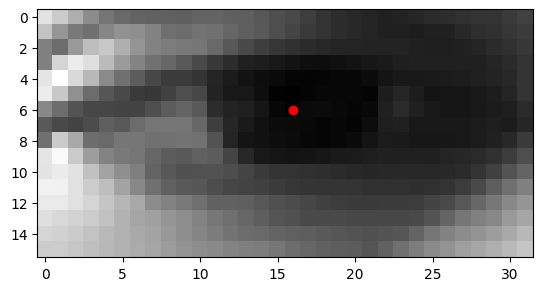

In [ ]:
# обработаем одну картинку
right_image, right_pupil, left_image, left_pupil = image_to_train_data(images[10], points[10])

plt.imshow(right_image, cmap="gray")

r_p_x = int(right_pupil[1] * image_shape[1])
r_p_y = int(right_pupil[0] * image_shape[0])
plt.scatter([r_p_x], [r_p_y], c="red")

In [ ]:
images_left_conc = []
images_right_conc = []
pupils_left_conc = []
pupils_right_conc = []

patients_path = os.path.join(database_path, "Data", "Original")
for patient in os.listdir(patients_path):
    print(patient)
    images, points = load_image_data(patient)
    for i in range(len(images)):
        signle_image_data = image_to_train_data(images[i], points[i])

        if any(stuff is None for stuff in signle_image_data):
            continue

        right_image, right_pupil, left_image, left_pupil = signle_image_data

        if any(right_pupil < 0) or any(left_pupil < 0):
            continue

        images_right_conc.append(right_image)
        images_left_conc.append(left_image)
        pupils_right_conc.append(right_pupil)
        pupils_left_conc.append(left_pupil)

images_left_conc = np.array(images_left_conc)
images_right_conc = np.array(images_right_conc)
pupils_left_conc = np.array(pupils_left_conc)
pupils_right_conc = np.array(pupils_right_conc)

# Нормализация изображений:


images_left_conc = images_left_conc / 255
images_right_conc = images_right_conc / 255

p01
p06
p02
p03
p08
p11
p12
p14
p04
p00
p13
p09
p10
p07
p05


In [ ]:
pupils_conc = np.zeros_like(pupils_left_conc)
for i in range(2):
    pupils_conc[:, i] = (pupils_left_conc[:, i] + pupils_right_conc[:, i]) / 2

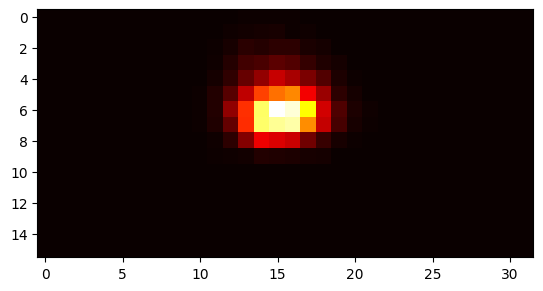

In [ ]:
viz_pupils = np.zeros(image_shape)
for y, x in pupils_conc:
    y = int(y * image_shape[0])
    x = int(x * image_shape[1])
    viz_pupils[y, x] += 1
max_val = viz_pupils.max()
viz_pupils = viz_pupils / max_val

plt.imshow(viz_pupils, cmap="hot")

In [ ]:
# еще несколько вкусных строчек
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import DataLoader, TensorDataset

# функция, разбивающая данные на два датасета -- тренировочный и валидационный
def make_2eyes_datasets(images_left, images_right, pupils, train_size=0.8):
    n, height, width = images_left.shape

    images_left = images_left.reshape(n, 1, height, width)
    images_right = images_right.reshape(n, 1, height, width)

    images_left_train, images_left_val, images_right_train, images_right_val, pupils_train, pupils_val = train_test_split(
        images_left, images_right, pupils, train_size=train_size
    )

    def make_dataset(im_left, im_right, pups):
        return TensorDataset(
            torch.from_numpy(im_left.astype(np.float32)), torch.from_numpy(im_right.astype(np.float32)), torch.from_numpy(pups.astype(np.float32))
        )

    train_dataset = make_dataset(images_left_train, images_right_train, pupils_train)
    val_dataset = make_dataset(images_left_val, images_right_val, pupils_val)

    return train_dataset, val_dataset

# преобразование датасетов в даталоадеры
def make_dataloaders(train_dataset, val_dataset, batch_size=256):
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    return train_dataloader, val_dataloader

In [ ]:
batch_size = 256

eyes_datasets = make_2eyes_datasets(images_left_conc, images_right_conc, pupils_conc)
eyes_train_loader, eyes_val_loader = make_dataloaders(*eyes_datasets, batch_size=batch_size)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# модуль, аналогичный `keras.layers.Reshape`
class Reshaper(nn.Module):
    def __init__(self, target_shape):
        super(Reshaper, self).__init__()
        self.target_shape = target_shape

    def forward(self, input):
        return torch.reshape(input, (-1, *self.target_shape))

# сама нейронка
class EyesNet(nn.Module):
    def __init__(self):
        super(EyesNet, self).__init__()

        # два feature-extractor'а с одинаковой архитектурой
        self.features_left = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            Reshaper([64])
        )
        self.features_right = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(),
            Reshaper([64])
        )
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 16),
            nn.LeakyReLU(),
            nn.Linear(16, 2),
            nn.Sigmoid()
        )

    def forward(self, x_left, x_right):
        # прогоняем две картинки через слои фич, конкатенируем и отдаем регрессору
        x_left = self.features_left(x_left)
        x_right = self.features_right(x_right)
        x = torch.cat((x_left, x_right), 1)
        x = self.fc(x)

        return x

In [ ]:
# функция обучения нейронки
def train(model, train_loader, test_loader, epochs, lr, folder="gazenet"):
    os.makedirs(folder, exist_ok=True)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    mse = nn.MSELoss()

    for epoch in range(epochs):
        running_loss = 0
        error_mean = []
        error_std = []
        for i, (*xs_batch, y_batch) in enumerate(train_loader):
            xs_batch = [x_batch.cuda() for x_batch in xs_batch]
            y_batch = y_batch.cuda()

            optimizer.zero_grad()

            y_batch_pred = model(*xs_batch)
            loss = mse(y_batch_pred, y_batch)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            difference = (y_batch - y_batch_pred).detach().cpu().numpy().reshape(-1)
            error_mean.append(np.mean(difference))
            error_std.append(np.std(difference))

        error_mean = np.mean(error_mean)
        error_std = np.mean(error_std)

        print(f"Epoch {epoch+1}/{epochs}, train loss: {running_loss}, error mean: {error_mean}, error std: {error_std}")

        running_loss = 0
        error_mean = []
        error_std = []
        for i, (*xs_batch, y_batch) in enumerate(train_loader):
            xs_batch = [x_batch.cuda() for x_batch in xs_batch]
            y_batch = y_batch.cuda()

            y_batch_pred = model(*xs_batch)
            loss = mse(y_batch_pred, y_batch)

            loss.backward()
            running_loss += loss.item()

            difference = (y_batch - y_batch_pred).detach().cpu().numpy().reshape(-1)
            error_mean.append(np.mean(difference))
            error_std.append(np.std(difference))

        error_mean = np.mean(error_mean)
        error_std = np.mean(error_std)

        print(f"Epoch {epoch+1}/{epochs}, val loss: {running_loss}, error mean: {error_mean}, error std: {error_std}")

        epoch_path = os.path.join(folder, f"epoch_{epoch+1}.pth")
        torch.save(model.state_dict(), epoch_path)

In [ ]:
eyesnet = EyesNet().cuda()
# полученные веса сохраняются в папку *eyes_net*
train(eyesnet, eyes_train_loader, eyes_val_loader, 300, 1e-3, "eyes_net")

Epoch 1/300, train loss: 0.31006685784086585, error mean: -0.018406052142381668, error std: 0.08819999545812607
Epoch 1/300, val loss: 0.18808413459919393, error mean: -0.012849682942032814, error std: 0.07301012426614761
Epoch 2/300, train loss: 0.1773432302288711, error mean: -0.0004228474572300911, error std: 0.0717369019985199
Epoch 2/300, val loss: 0.1658473948482424, error mean: 0.00047641259152442217, error std: 0.06961005926132202
Epoch 3/300, train loss: 0.15187616739422083, error mean: 0.0008221790776588023, error std: 0.06637711077928543
Epoch 3/300, val loss: 0.14167129015550017, error mean: -0.0072384481318295, error std: 0.06392253190279007
Epoch 4/300, train loss: 0.1307685226202011, error mean: -0.00034262871486134827, error std: 0.061552852392196655
Epoch 4/300, val loss: 0.11403979267925024, error mean: -0.0005622169119305909, error std: 0.05775299295783043
Epoch 5/300, train loss: 0.10299714223947376, error mean: 0.0005738222389481962, error std: 0.054408252239227295

In [ ]:
import random

# рисует левый и правый глаз и выставляет реальное и предсказанное положение зрачка
def show_output(model, data_loader, batch_num=0, samples=5, grid_shape=(5, 1), figsize=(10, 10)):
    for i, (*xs, y) in enumerate(data_loader):
        if i == batch_num:
            break
    xs = [x.cuda() for x in xs]
    y_pred = model(*xs).detach().cpu().numpy().reshape(-1, 2)

    xs = [x.detach().cpu().numpy().reshape(-1, 16, 32) for x in xs]
    imgs_conc = np.hstack(xs)
    y = y.cpu().numpy().reshape(-1, 2)

    indices = random.sample(range(len(y_pred)), samples)
    fig, axes = plt.subplots(*grid_shape, figsize=figsize)
    for i, index in enumerate(indices):
        row = i // grid_shape[1]
        column = i % grid_shape[1]

        axes[row, column].imshow(imgs_conc[index])
        axes[row, column].scatter([y_pred[index, 1]*32, y_pred[index, 1]*32], [y_pred[index, 0]*16, (y_pred[index, 0]+1)*16], c="r")
        axes[row, column].scatter([y[index, 1]*32, y[index, 1]*32], [y[index, 0]*16, (y[index, 0]+1)*16], c="g")

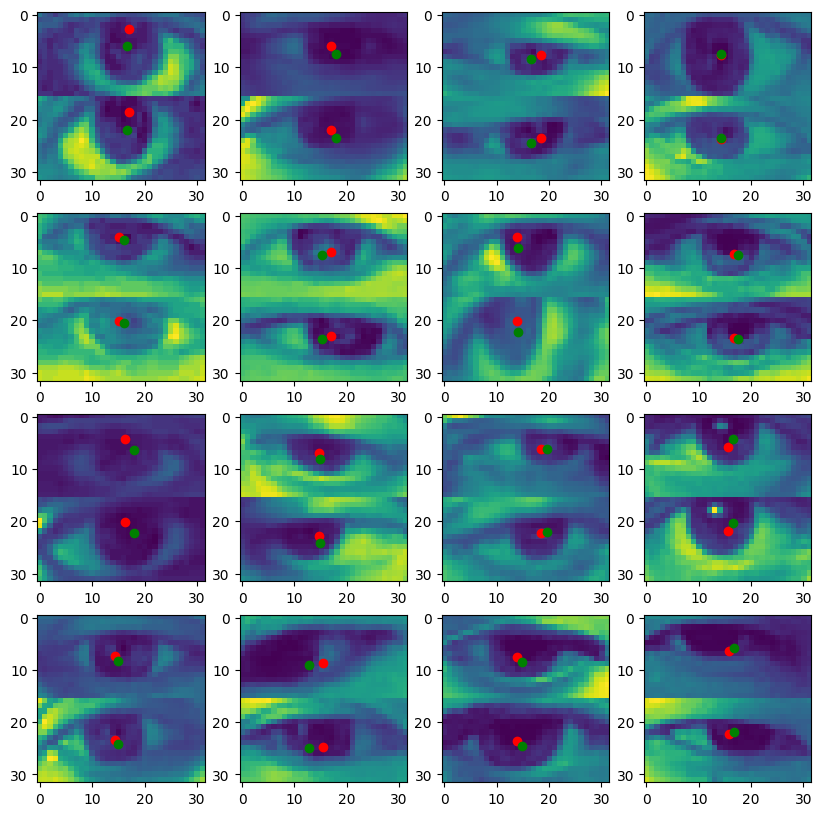

In [ ]:
# загружаем 299 эпоху
eyesnet.load_state_dict(torch.load("eyes_net/epoch_299.pth"))

show_output(eyesnet, eyes_val_loader, 103, 16, (4, 4))

In [ ]:
def error_distribution(model, data_loader, image_shape=(16, 32), bins=32, digits=2, figsize=(10,10)):
    ys_true = []
    ys_pred = []
    for *xs, y in data_loader:
        xs = [x.cuda() for x in xs]
        y_pred = model(*xs)

        ys_true.append(y.detach().cpu().numpy())
        ys_pred.append(y_pred.detach().cpu().numpy())
    ys_true = np.concatenate(ys_true)
    ys_pred = np.concatenate(ys_pred)
    indices = np.arange(len(ys_true))

    fig, axes = plt.subplots(2, figsize=figsize)
    for ax_num in range(2):
        ys_true_subset = ys_true[:, ax_num]
        ys_pred_subset = ys_pred[:, ax_num]
        counts, ranges = np.histogram(ys_true_subset, bins=bins)

        errors = []
        labels = []
        for i in range(len(counts)):
            begin, end = ranges[i], ranges[i + 1]
            range_indices = indices[(ys_true_subset >= begin) & (ys_true_subset <= end)]

            diffs = np.abs(ys_pred_subset[range_indices] - ys_true_subset[range_indices])
            label = (begin + end) / 2
            if image_shape:
                diffs = diffs * image_shape[ax_num]
                label = label * image_shape[ax_num]
            else:
                label = round(label, digits)
            errors.append(diffs)
            labels.append(str(label)[:2+digits])

        axes[ax_num].boxplot(errors, labels=labels)

        if image_shape:
            y_label = "difference, px"
            x_label = "true position, px"
        else:
            y_label = "difference"
            x_label = "true position"
        axes[ax_num].set_ylabel(y_label)
        axes[ax_num].set_xlabel(x_label)

        if ax_num == 0:
            title = "Y"
        else:
            title = "X"
        axes[ax_num].set_title(title)

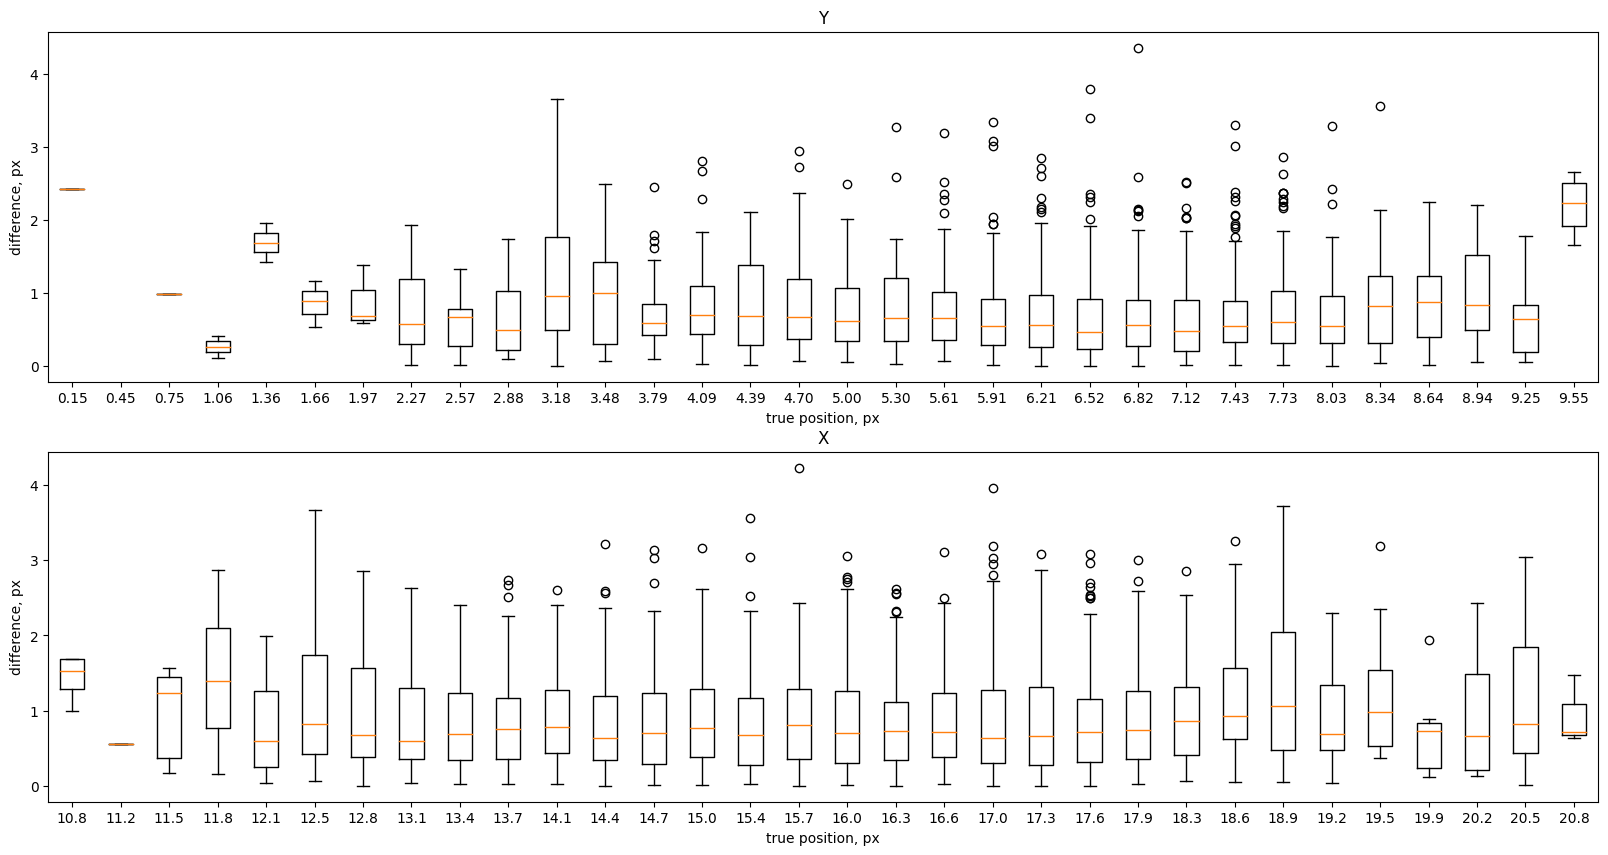

In [ ]:
error_distribution(eyesnet, eyes_val_loader, figsize=(20, 10))

In [ ]:
import time

def measure_time(model, data_loader, n_batches=5):
    begin_time = time.time()

    batch_num = 0
    n_samples = 0

    predicted = []
    for *xs, y in data_loader:
        xs = [x.cpu() for x in xs]

        y_pred = model(*xs)
        predicted.append(y_pred.detach().cpu().numpy().reshape(-1))

        batch_num += 1
        n_samples += len(y)

        if batch_num >= n_batches:
            break

    end_time = time.time()

    time_per_sample = (end_time - begin_time) / n_samples
    return time_per_sample

eyesnet_cpu = EyesNet().cpu()
eyesnet_cpu.load_state_dict(torch.load("eyes_net/epoch_299.pth", map_location="cpu"))

# сделаем dataloader, подающий изображения по одному, чтобы сэмулировать работу в realtime
_, eyes_val_loader_single = make_dataloaders(*eyes_datasets, batch_size=1)

tps = measure_time(eyesnet_cpu, eyes_val_loader_single)
print(f"{tps} seconds per sample")


0.02649226188659668 seconds per sample


In [ ]:
import torchvision.models as models

class VGG16Based(nn.Module):
    def __init__(self):
        super(VGG16Based, self).__init__()

        self.vgg = models.vgg16(pretrained=False)
        self.vgg.classifier = nn.Sequential(
            nn.Linear(25088, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 2),
            nn.Sigmoid()
        )

    def forward(self, x_left, x_right):
        x_mid = (x_left + x_right) / 2
        x = torch.cat((x_left, x_mid, x_right), dim=1)

        # добавляем паддинг, чтобы VGG16 смогла извлечь фичи
        x_pad = torch.zeros((x.shape[0], 3, 32, 32))
        x_pad[:, :, :16, :] = x

        x = self.vgg(x_pad)

        return x

vgg16 = VGG16Based()
vgg16_tps = measure_time(vgg16, eyes_val_loader_single)
print(f"{vgg16_tps} seconds per sample")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


0.024370718002319335 seconds per sample
